# Cardio Disease Project:
    The dataset  presents 70,000 data separated into 12 distinct characteristics, such as age, gender, blood pressure, cholesterol, smoker or non-smoker, etc. The target class will be 'cardio', which will be described as: '0' when the patient is healthy and '1' when the patient has cardiovascular disease.

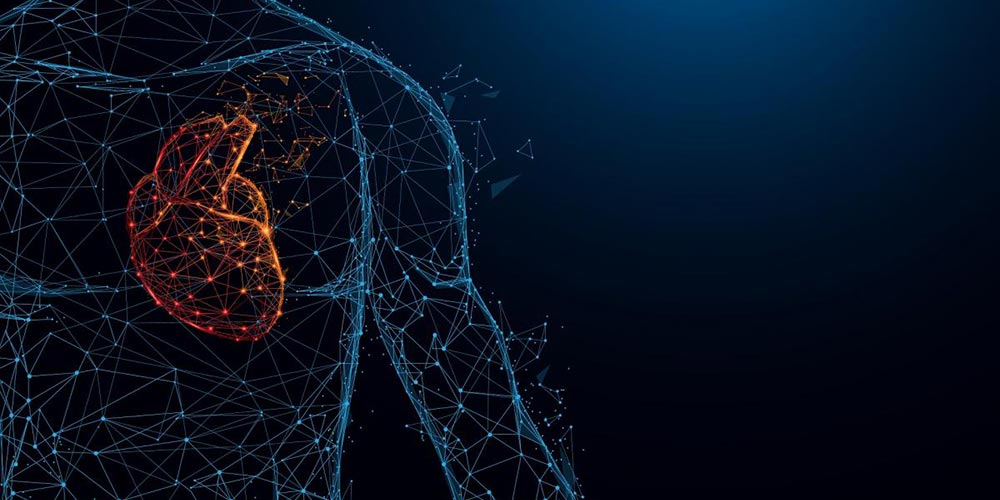

## Data Description
1. **Age** | Objective Feature | age | int (days)
2. **Height** | Objective Feature | height | int (cm) |
3. **Weight** | Objective Feature | weight | float (kg) |
4. **Gender** | Objective Feature | gender | categorical code | 1:woman 2: man
5. **Systolic blood pressure** | Examination Feature | ap_hi | int |
6. **Diastolic blood pressur**e | Examination Feature | ap_lo | int |
7. **Cholesterol** | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. **Glucose** | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. **Smoking** | Subjective Feature | smoke | binary |
10. **Alcohol intake** | Subjective Feature | alco | binary |
11.**Physical activity** | Subjective Feature | active | binary |
12. **Presence or absence of cardiovascular disease** | Target Variable | cardio | 1: disease 0: no|

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [2]:
n = None
df = pd.read_csv('cardio_train.csv', delimiter = ';', nrows = n)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
#Data dimension
print("Number of rows: {}".format(df.shape[0]));
print("Number of columns: {}".format(df.shape[1]))
df.info()

Number of rows: 70000
Number of columns: 13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## Preparando os dados

In [4]:
# Primeiro, para uma melhor análise iremos converter a unidade em 'dias'
# para 'anos' da coluna 'age'

df['age'] = df['age'].apply(lambda x: x/365)

df['age'] = df['age'].astype(int)

In [5]:
# Drop the ID column 
df = df.drop('id', axis = 1)

Importante analisar a **estatística descritiva** do dataset, a formula a seguir
retorna valores importantes do dataset por variável, tais como:
média, desvio padrão, valor máximo e mínimo.

In [6]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Se olharmos com mais detalhe a tabela acima é possível observar alguns valores que poderá ser um erro ou outlier que irá prejudicar as análises futuras. Por exemplo:
        1. minimum height está como 55 cm
        2. minimum weight está como 10kg
        3. minimum pressão sistólica e diastólica negativas
        4. Importante verificar se existe algum dado em que a diastólica está maior que a sistólica, o que é impossível de ocorrer.
        
Podemos afirmar que é um erro, pois a idade mínima do dataset é 29 anos.
Assim, importante tratar os outliers antes de iniciar uma análise mais aprofundada:

In [7]:
# Detecção e remoção de outliers pela abordagem de Intervalo Interquartil (IQR)

def remove_outlier(col):
    
    Q1 = np.percentile(df[col], 25,
                  interpolation = 'midpoint')
    Q3 = np.percentile(df[col], 75,
                  interpolation = 'midpoint')
    IQR = Q3 - Q1
    print('Old Shape: ', df.shape)

    upper = np.where(df[col] >= (Q3+1.5*IQR))
    lower = np.where(df[col] <= (Q1-1.5*IQR))

    # Remove outliers
    df.drop(upper[0], inplace = True)
    df.drop(lower[0], inplace = True)
    print ('New Shape: ', df.shape)

In [8]:
remove_outlier('height')

Old Shape:  (70000, 12)
New Shape:  (69481, 12)


In [9]:
# Analisando as variáveis 'ap_hi' e 'ap_lo'
print('Pressão siastólica é maior que a diastólica em {0} casos'.format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Pressão siastólica é maior que a diastólica em 1221 casos


In [10]:
# Utilizaremos outro método para tratar os outliers da pressão sistólica e diastólica
# 1. Pressão diastólica e sistólica não podem ser valores negativos
# 2. Pressão diastólica não poderá ser maior que a pressão sistólica, assim:

df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

print("Pressão siastólica é maior que a diastólica em {0} casos".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Pressão siastólica é maior que a diastólica em 0 casos


In [11]:
display (df.describe())
display (df.shape)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000,65708.00000,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000
mean,52.860489,1.348633,164.465940,74.043265,126.245313,81.18430,1.361204,1.224113,0.087250,0.052809,0.803905,0.492725
std,6.759225,0.476541,7.580947,14.029845,14.457192,8.39941,0.677379,0.570927,0.282203,0.223654,0.397044,0.499951
min,29.000000,1.000000,143.000000,11.000000,100.000000,60.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,186.000000,200.000000,170.000000,100.00000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


(65708, 12)

In [12]:
# Com as variáveis weight e height em mãos, será interessante para análise
# criar a coluna de 'IMC'. É sabido que o IMC poderá ter forte correlação
# com doenças cardiovasculares. Valores normais do IMC variam entre o intervalo de  18.5 até 25.

df['IMC'] = df['weight']/((df['height']/100)**2)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


## Análise Exploratória

In [13]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
count,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000,65708.00000,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000
mean,52.860489,1.348633,164.465940,74.043265,126.245313,81.18430,1.361204,1.224113,0.087250,0.052809,0.803905,0.492725,27.406913
std,6.759225,0.476541,7.580947,14.029845,14.457192,8.39941,0.677379,0.570927,0.282203,0.223654,0.397044,0.499951,5.119358
min,29.000000,1.000000,143.000000,11.000000,100.000000,60.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.298488
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.110279
max,64.000000,2.000000,186.000000,200.000000,170.000000,100.00000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,68.308315


    Para iniciar a análise exploratória é importante verificar se os dados da variável target 'cardio' estão balanceados no dataset, uma vez que dados desbalanceados podem acarretar em problemas na construção de modelos e geração de previsões.


In [14]:
# Verificando a distribuição da variável 'cardio' no dataset:
# Get a count of the number of individuals with cardio

display (df['cardio'].value_counts());
display (print("\nPacientes com doenças cardíacas representam {:.2f}% do dataset.\n".format((df[df.cardio == 1].shape[0] / df.shape[0]) * 100)));


0    33332
1    32376
Name: cardio, dtype: int64


Pacientes com doenças cardíacas representam 49.27% do dataset.



None

In [15]:
#Estilo / design para os gráficos
plt.style.use('ggplot')

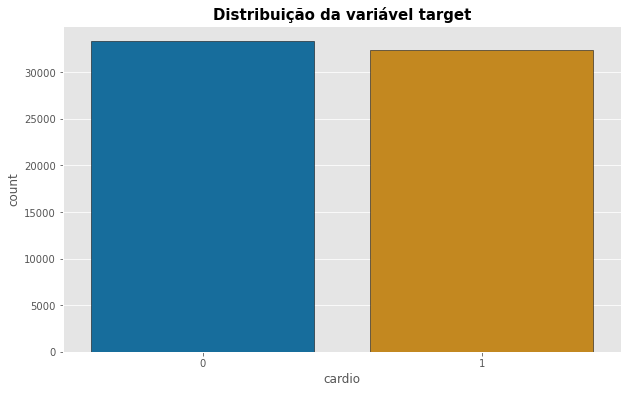

In [16]:
# visualize the amount of cardio disease in the dataset
# Podemos afirmar que a variável target está balanceada ao longo do dataset

plt.figure(figsize=(10,6))
fig = sns.countplot(x='cardio', data=df, palette='colorblind', edgecolor='black')
fig.set_title('Distribuição da variável target', fontsize = 15, weight = 'bold');

    A primeira análise que iremos realizar é a influência da idade com o surgimento das doenças cardiacas. É possível afirmar que quanto maior a idade, maior a probabilidade de se desenvolver doenças cardíacas?

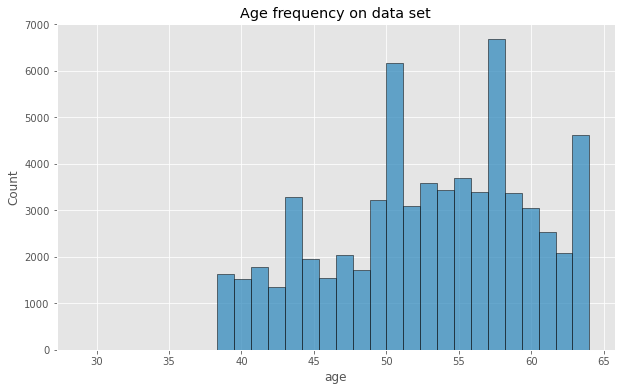

In [17]:
# Primeiro passo: analisar a distribuição da variável idade no dataset:
#Age frequency on the dataset

plt.figure(figsize=(10,6))
plt.title('Age frequency on data set')

sns.histplot(data=df, x = 'age', bins = 30, edgecolor ='black');

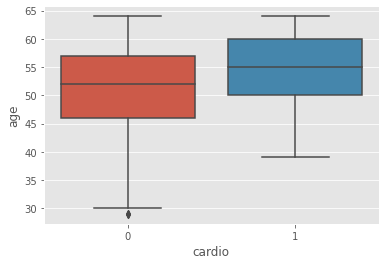

In [18]:
# Categorica x Numerica
sns.boxplot(x="cardio", y="age", data=df);

<Figure size 1440x1296 with 0 Axes>

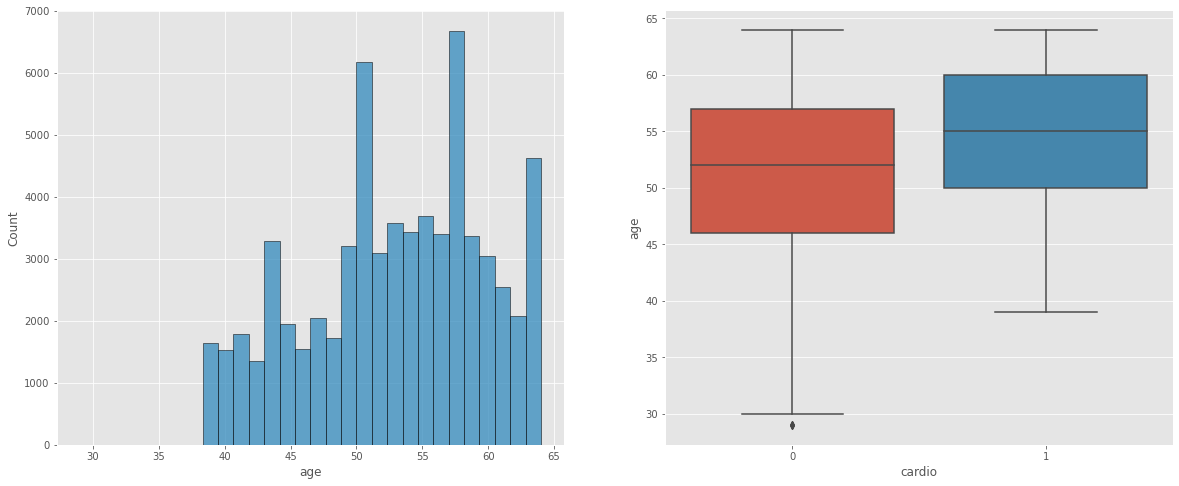

In [19]:
plt.figure (figsize = (20,18))
f, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(20,8));
plt.tight_layout;


sns.histplot(data=df, x = 'age', bins = 30,  edgecolor ='black', ax = axes[0]);
sns.boxplot(x="cardio", y="age", data=df, ax = axes[1]);

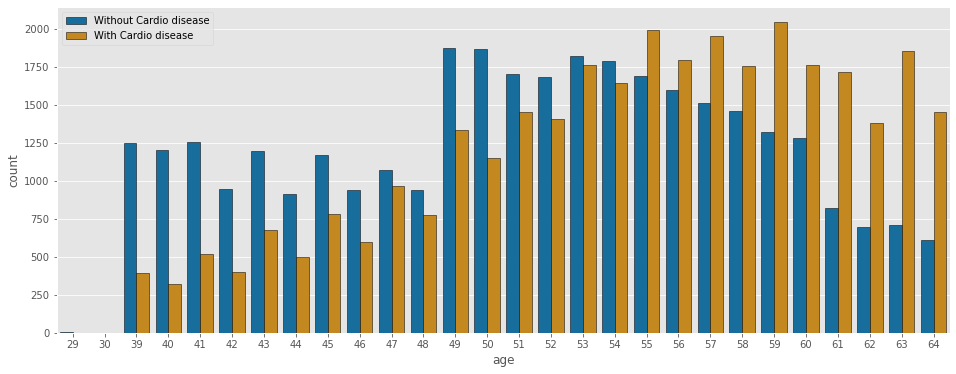

In [20]:
# Segundo passo: analisar se há correlação entre idade e surgimento
# de doenças cardíacas:
# Age x Cardio#

# O gráfico abaixo demonstra claramente que existe uma tendência no data set
# que após a idade de 55 anos, a amostra de pacientes com doenças cardíacas é
# maior que dos pacientes sem doenças cardíacas. 

plt.figure(figsize=(16,6))
fig = sns.countplot(x='age', hue='cardio', data=df, 
                    palette='colorblind', 
                    edgecolor='black')
plt.legend(labels =['Without Cardio disease','With Cardio disease'], 
           loc='upper left');


    A segunda análise a ser feita é: existe uma correlação entre gênero e a presença de doença cardíaca?

In [21]:
#Number per gender
df['gender'].value_counts()

1    42800
2    22908
Name: gender, dtype: int64

In [22]:
#Percentual -> normalize = True
pd.crosstab(df['cardio'],df['gender'],normalize=True)

gender,1,2
cardio,,
0,0.330371,0.176904
1,0.320996,0.171729


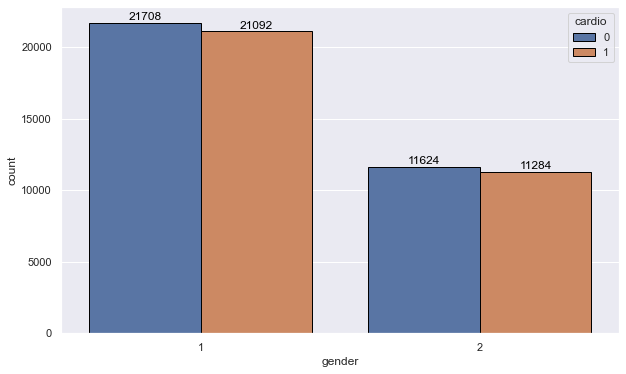

In [23]:
#Gender x Cardio - Count number by gender who have cardio disease
                #  1: man and 2: woman      
#Aparentemente não há correlação entre gênero e presença de doenças cardíacas

plt.figure(figsize=(10,6))
sns.set(font_scale = 1)

ax = sns.countplot(x='gender', hue='cardio', data=df, 
                    palette='deep', 
                    edgecolor='black')

for i in ax.patches:
    ax.annotate(i.get_height(),
               (i.get_x() + i.get_width() / 2, i.get_height()),
               ha = 'center', va = 'baseline', fontsize = 12, color = 'black',
               xytext = (0,3),
               textcoords = 'offset points')


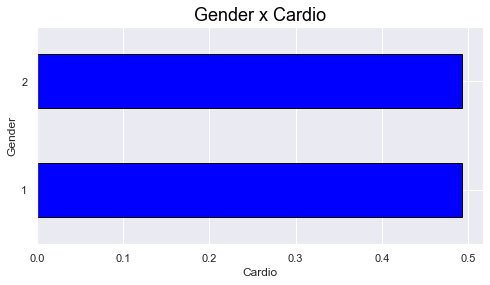

In [24]:
plt.figure(figsize=(8,4))
df.groupby('gender')['cardio'].mean().plot.barh(color = 'blue', edgecolor ='black')

plt.xlabel ('Cardio', fontsize=12)
plt.ylabel('Gender', fontsize=12)
plt.title('Gender x Cardio', fontsize = 18, color = 'black');

Vamos analisar a relação entre as variáveis categórias e variável target




**1. Cholesterol:** 1: normal, 2: above normal, 3: well above normal 
    

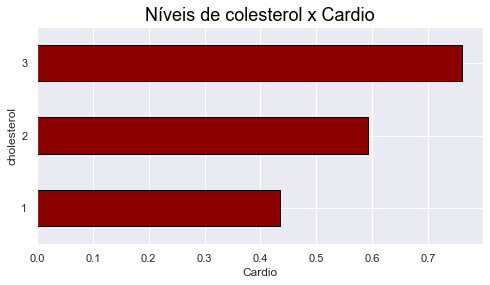

In [25]:
plt.figure(figsize=(8,4))
plt.xlabel ('Cardio', fontsize=12)
plt.ylabel('Cholesterol', fontsize=12)
plt.title('Níveis de colesterol x Cardio', fontsize = 18, color = 'black')

df.groupby('cholesterol')['cardio'].mean().plot.barh(color='darkred',
                                               edgecolor ='black');

2. **Gluc x Cardio**
Claramente possível observar que quanto maior o nível de glicose (1: normal, 2: above normal, 3: well above normal), maior a amostra de presença de doença cardíaca

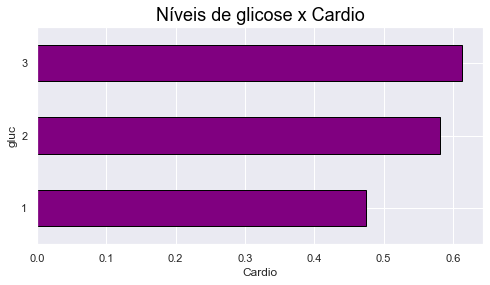

In [26]:
plt.figure(figsize=(8,4))
plt.xlabel ('Cardio', fontsize=12)
plt.ylabel('Gluc', fontsize=12)
plt.title('Níveis de glicose x Cardio', fontsize = 18, color = 'black')
df.groupby('gluc')['cardio'].mean().plot.barh(color='purple',
                                               edgecolor ='black');


In [27]:
# correlation between the data
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
age,1.000000,-0.028151,-0.092352,0.050523,0.205805,0.148482,0.153196,0.097432,-0.049924,-0.029899,-0.010597,0.236886,0.100071
gender,-0.028151,1.000000,0.521904,0.149769,0.047941,0.054308,-0.039956,-0.023213,0.337275,0.169960,0.006124,-0.000214,-0.113794
height,-0.092352,0.521904,1.000000,0.301193,0.002943,0.023128,-0.060337,-0.023617,0.194875,0.096800,-0.008390,-0.019472,-0.195545
weight,0.050523,0.149769,0.301193,1.000000,0.249314,0.228882,0.137139,0.102180,0.064978,0.064838,-0.015971,0.169294,0.872020
ap_hi,0.205805,0.047941,0.002943,0.249314,1.000000,0.698403,0.193408,0.088354,0.022254,0.029605,-0.000024,0.431903,0.254181
ap_lo,0.148482,0.054308,0.023128,0.228882,0.698403,1.000000,0.154919,0.067722,0.019669,0.030344,-0.001612,0.330567,0.223103
cholesterol,0.153196,-0.039956,-0.060337,0.137139,0.193408,0.154919,1.000000,0.451216,0.008377,0.031907,0.008721,0.219245,0.170878
gluc,0.097432,-0.023213,-0.023617,0.102180,0.088354,0.067722,0.451216,1.000000,-0.006125,0.007667,-0.007607,0.086436,0.116258
smoke,-0.049924,0.337275,0.194875,0.064978,0.022254,0.019669,0.008377,-0.006125,1.000000,0.341498,0.024614,-0.019610,-0.033048
alco,-0.029899,0.169960,0.096800,0.064838,0.029605,0.030344,0.031907,0.007667,0.341498,1.000000,0.024414,-0.011400,0.016496


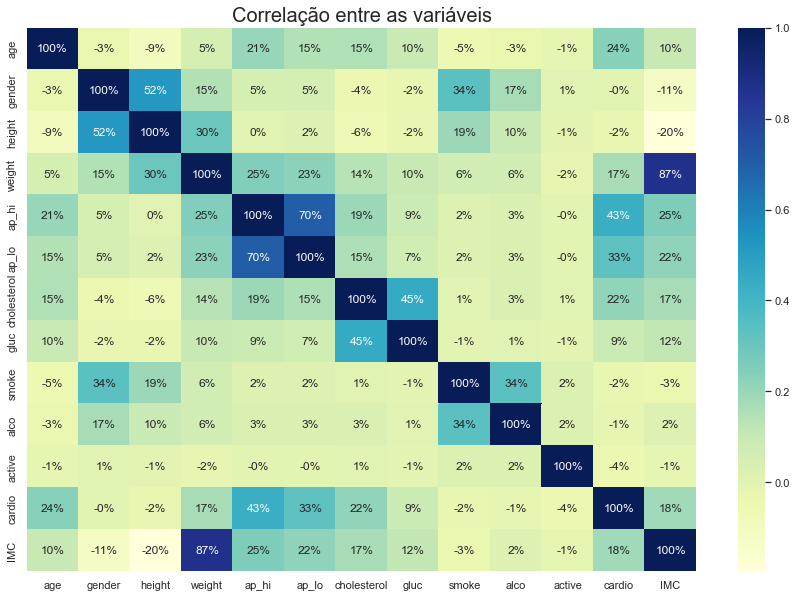

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Correlação entre as variáveis', fontsize = 20);

# Machine Learning

## Import Libraries

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Ignorar warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import warnings
warnings.filterwarnings("ignore")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65708 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          65708 non-null  int32  
 1   gender       65708 non-null  int64  
 2   height       65708 non-null  int64  
 3   weight       65708 non-null  float64
 4   ap_hi        65708 non-null  int64  
 5   ap_lo        65708 non-null  int64  
 6   cholesterol  65708 non-null  int64  
 7   gluc         65708 non-null  int64  
 8   smoke        65708 non-null  int64  
 9   alco         65708 non-null  int64  
 10  active       65708 non-null  int64  
 11  cardio       65708 non-null  int64  
 12  IMC          65708 non-null  float64
dtypes: float64(2), int32(1), int64(10)
memory usage: 8.8 MB


In [31]:
# Select features
cols_to_use = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco',
              'active', 'IMC']
X = df[cols_to_use]

# Select target
y = df.cardio

# Separate data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Teste Data: {X_test.shape}, {y_test.shape}")

Train Data: (45995, 12), (45995,)
Teste Data: (19713, 12), (19713,)


In [32]:
# Defining Model
model = RandomForestClassifier(n_estimators = 100,
                              random_state = 0)

#Training model
model.fit(X_train, y_train)

#Predict model
y_pred = model.predict(X_test)

In [33]:
#Score

result = model.score(X_test, y_test)
print ("A acurácia nos dados de teste: %.3f%%" % (result * 100))

A acurácia nos dados de teste: 70.314%


In [34]:
# Perfomance do modelo:
print ('Accuracy: ', accuracy_score (y_test, y_pred))

Accuracy:  0.7031400598589763


In [35]:
print (classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71     10063
           1       0.70      0.69      0.69      9650

    accuracy                           0.70     19713
   macro avg       0.70      0.70      0.70     19713
weighted avg       0.70      0.70      0.70     19713



**Cross-validation**

In [43]:
# Definindo valores para folds
n_folds = 2

kfold = KFold (n_folds, True, random_state = 0)

result = cross_val_score(model, X, y, cv = kfold)

# Score
                               
print('Acurácia Final: %3.f%%' % (result.mean()*100))

Acurácia Final:  71%


In [44]:
result

array([0.70399343, 0.70785901])

**Matriz de confusão:**

    Uma matriz de confusão é uma matriz quadrada N dimensional, onde N representa o número total de classes ou categorias alvo. A matriz de confusão pode ser usada para avaliar um classificador sempre que o conjunto de dados estiver desequilibrado. Vamos considerar um problema de classificação binária, ou seja, o número de classes de destino é 2. Uma matriz de confusão típica com duas classes de destino (digamos "Sim" e "Não"):
    
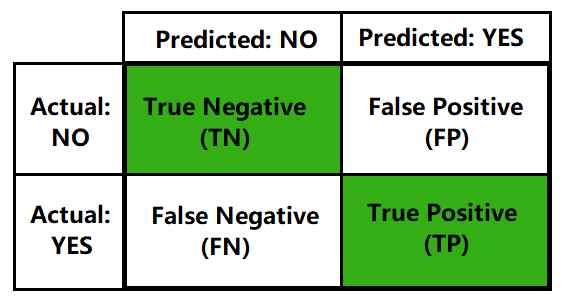
   
- True Positives (TP): Casos em que a previsão 'YES' realmente pertence a classe 'YES'.
- True Negatives (TN): Casos em que a previsão 'NO' realmente pertence a classe 'NO'.
- False Positives (FP): Casos em que a previsão 'YES' na verdade pertence a classe 'NO'. - Type 1 error
- False Negatives (FN): Casos em que a previsão 'NO' na verdade pertence a classe 'YES'. - Type 2 error

[[7234 2829]
 [3023 6627]]


<Figure size 1080x720 with 0 Axes>

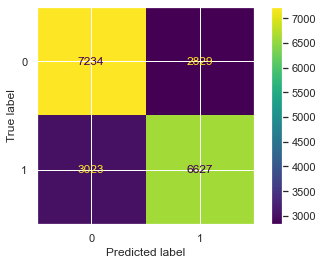

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# confusion_matrix funnction:
print(confusion_matrix(y_test, y_pred))

# plot_confusion_matrix function is used to visualize the confusion matrix
plt.figure(figsize=(15,10))
plot_confusion_matrix(model, X_test, y_test)
plt.show();

**A acurácia do classificador poderá ser calculado a partir da matriz de confusão utilizando a seguinte fórmula:**
    
    Accuracy = (TP + TN) / (TP + FP + TN + FN)
    Accuracy = (6627 + 7234) / (6627 + 2829 + 7234 + 3023)
    Accuracy = 0,703 ou 70.3%

In [39]:
#Precision
from sklearn.metrics import precision_score

# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, y_pred)}")

Precision Score of the classifier is: 0.7008248730964467


In [40]:
#Sensitivy (Recall)
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, y_pred)}")

Recall Score of the classifier is: 0.6867357512953368


**F1 Score:** Deve ser usado quando precisão e recall são importantes para o caso estudado. É a media harmônica entre eles.

    É definido entre 0,1.
    F1 Score = 2 * Precision * Recall / Precision + Recall
- If both False Positives (FP) and False Negatives (FN) are important, then β = 1.
- If False Positive (FP) is important, then β lies between o and 1.
- If False Negative (FN) is important, then β > 1.

In [41]:
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, y_pred)}")

F1 Score of the classifier is: 0.693708782581388


**AUC-ROC Curve:** 

     Curva AUC-ROC é uma métrica de desempenho que é usada para medir o desempenho do modelo de classificação em diferentes valores de limite. ROC é a curva característica de operação do receptor e AUC é a área sob a curva. Quanto maior o valor de AUC (Área sob a curva), melhor é o nosso classificador na previsão das classes. AUC-ROC é usado principalmente em problemas de classificação binária.

    A curva ROC é plotada entre a taxa de verdadeiros positivos (TPR) e a taxa de falsos positivos (FPR), ou seja, TPR no eixo y e FPR no eixo x. AUC é a área sob a curva ROC. 
 
**Um classificador excelente tem um valor de AUC próximo a 1, enquanto um classificador de baixo desempenho tem um valor de AOC próximo a 0. Um classificador com uma pontuação de AOC de 0,5 não tem capacidade de separação de classes.**

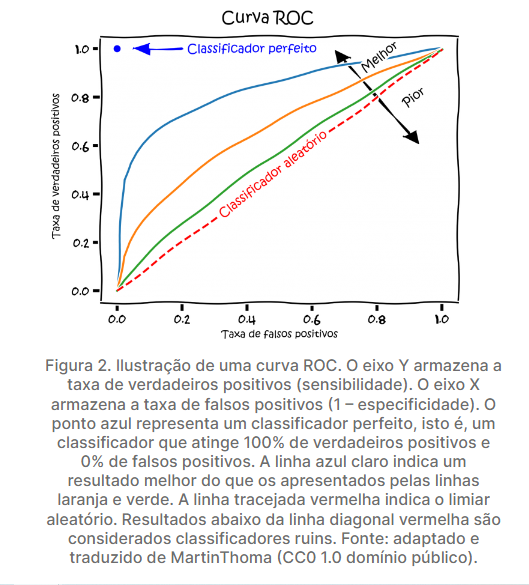

AUC for our classifier is: 0.7600495942917136


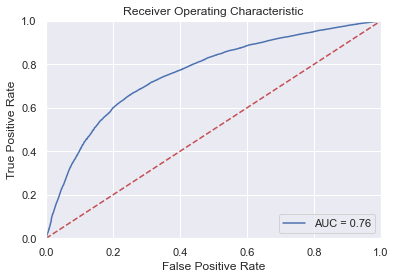

In [42]:
from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()